## Analysis of Coffee Consumption and Production

In [1]:
# Load required libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
coffee_consumption_data = pd.read_csv('Coffee_domestic_consumption.csv')
coffee_production_data = pd.read_csv('Coffee_production.csv')

In [3]:
coffee_consumption_data.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [4]:
coffee_production_data.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


# 1. Domestic Coffee Consumption

## 1.1 Top 10 Coffee Consuming Countries

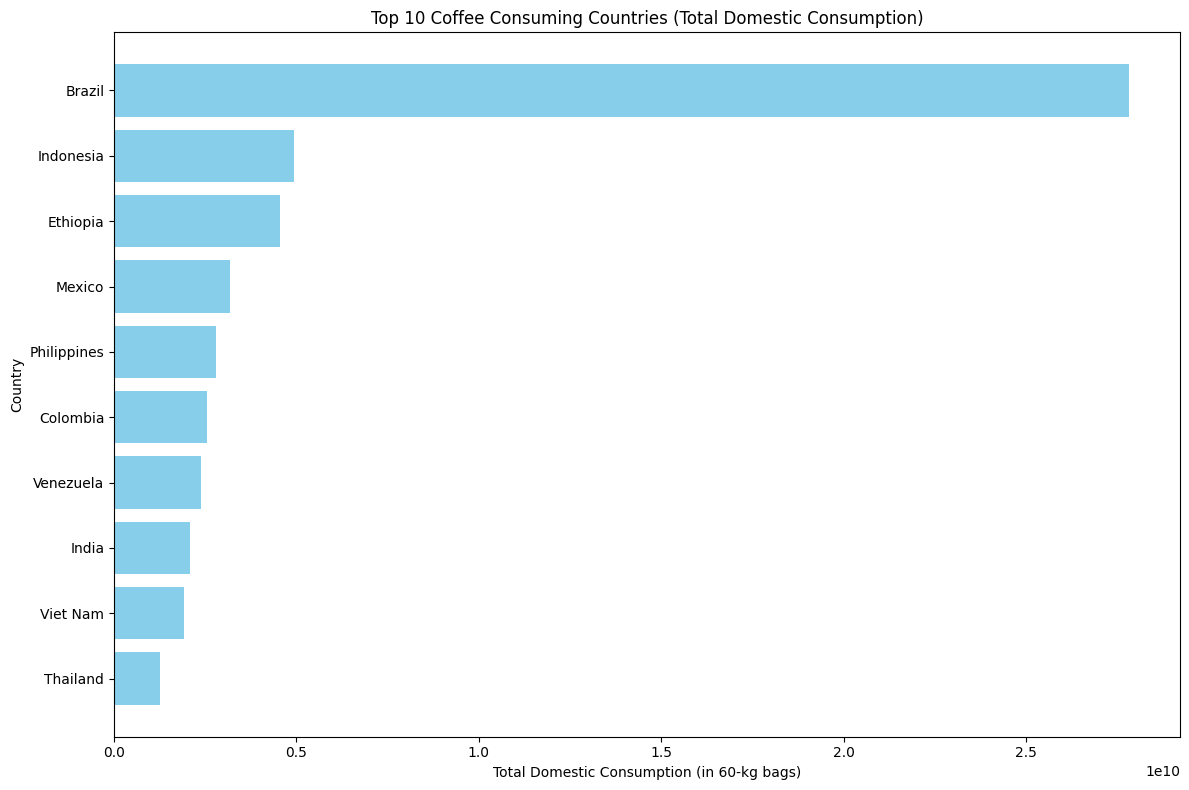

In [5]:
top_countries_total = coffee_consumption_data.sort_values(by='Total_domestic_consumption', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_countries_total['Country'], top_countries_total['Total_domestic_consumption'], color='skyblue')
plt.xlabel('Total Domestic Consumption (in 60-kg bags)')
plt.ylabel('Country')
plt.title('Top 10 Coffee Consuming Countries (Total Domestic Consumption)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top
plt.tight_layout()
plt.show()

## 1.2 Yearly Coffee Consumption Trends of Top 10 Countries

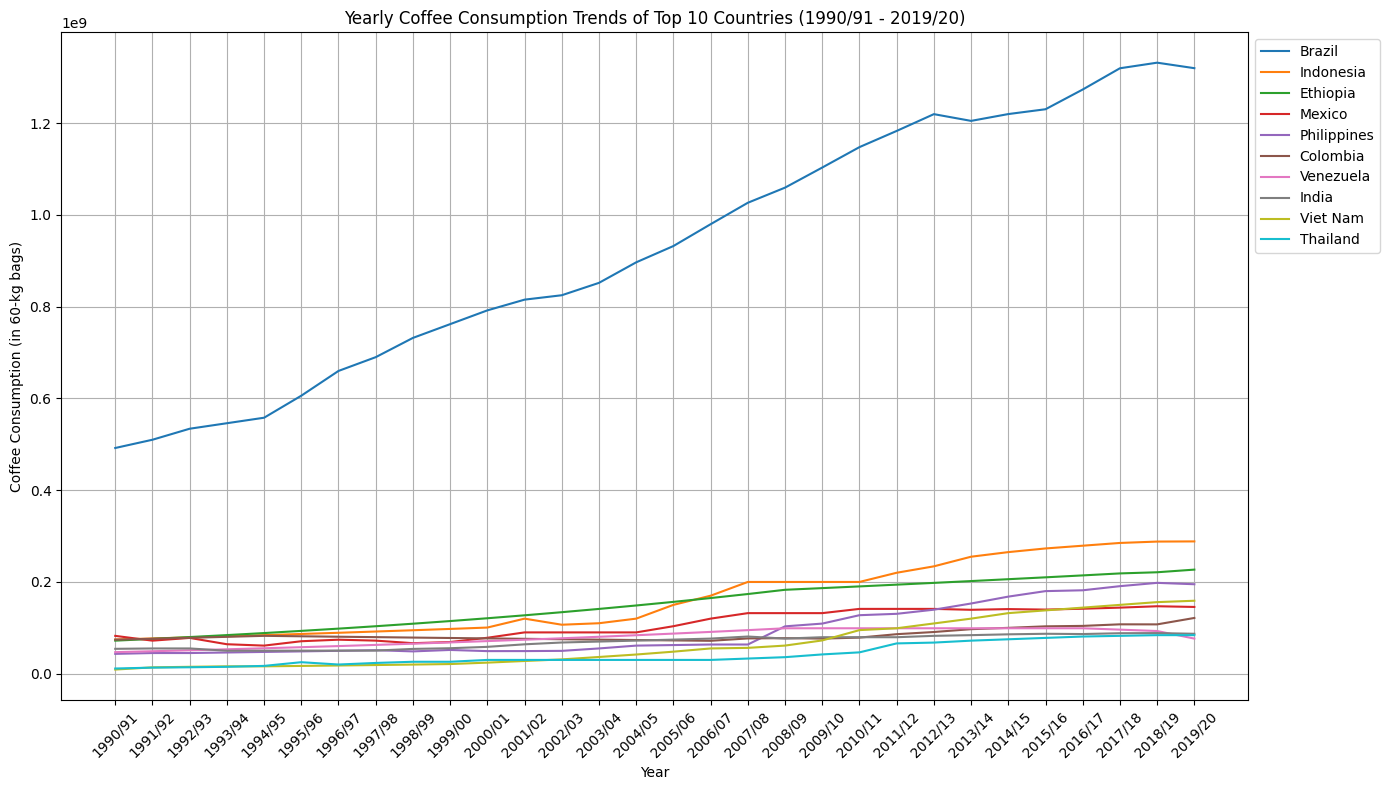

In [6]:
years_columns = top_countries_total.columns[2:-1]  # Excluding 'Country', 'Coffee type', and 'Total_domestic_consumption'
top_countries_trend = top_countries_total.set_index('Country')[years_columns].transpose()

# Plotting
plt.figure(figsize=(14, 8))
for country in top_countries_trend.columns:
    plt.plot(top_countries_trend.index, top_countries_trend[country], label=country)

plt.title('Yearly Coffee Consumption Trends of Top 10 Countries (1990/91 - 2019/20)')
plt.xlabel('Year')
plt.ylabel('Coffee Consumption (in 60-kg bags)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

## 1.3 Analysis of Global Coffee Consumption by Type

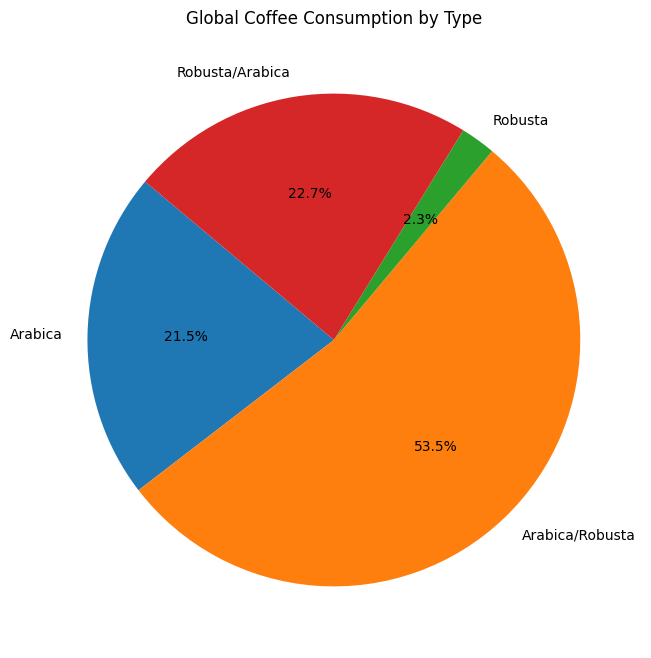

In [7]:
# Summarize global consumption by coffee type
coffee_type_sum = coffee_consumption_data.groupby('Coffee type')['Total_domestic_consumption'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(coffee_type_sum, labels=coffee_type_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Global Coffee Consumption by Type')
plt.show()

## 1.4 Top 10 Coffee Consuming Countries by Coffee Type

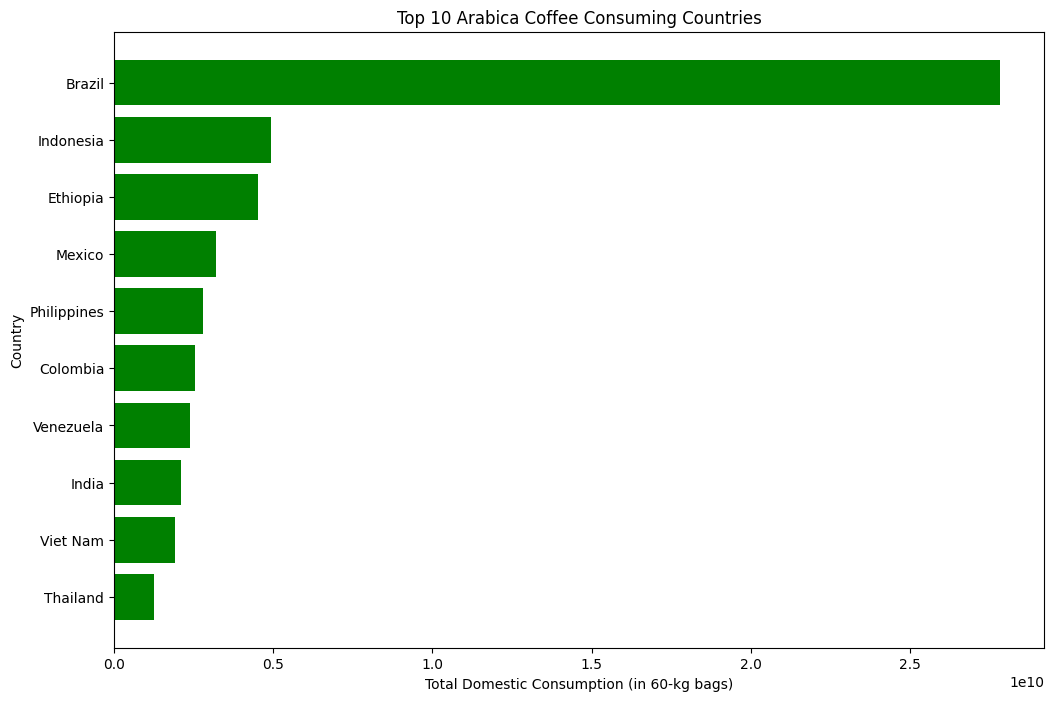

In [8]:
# Example for Arabica
arabica_data = coffee_consumption_data[coffee_consumption_data['Coffee type'].str.contains('Arabica')]
top_arabica_countries = arabica_data.sort_values(by='Total_domestic_consumption', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_arabica_countries['Country'], top_arabica_countries['Total_domestic_consumption'], color='green')
plt.xlabel('Total Domestic Consumption (in 60-kg bags)')
plt.ylabel('Country')
plt.title('Top 10 Arabica Coffee Consuming Countries')
plt.gca().invert_yaxis()
plt.show()


# 2. Coffee Production 

## 2.1 Top 10 Coffee Producing Countries

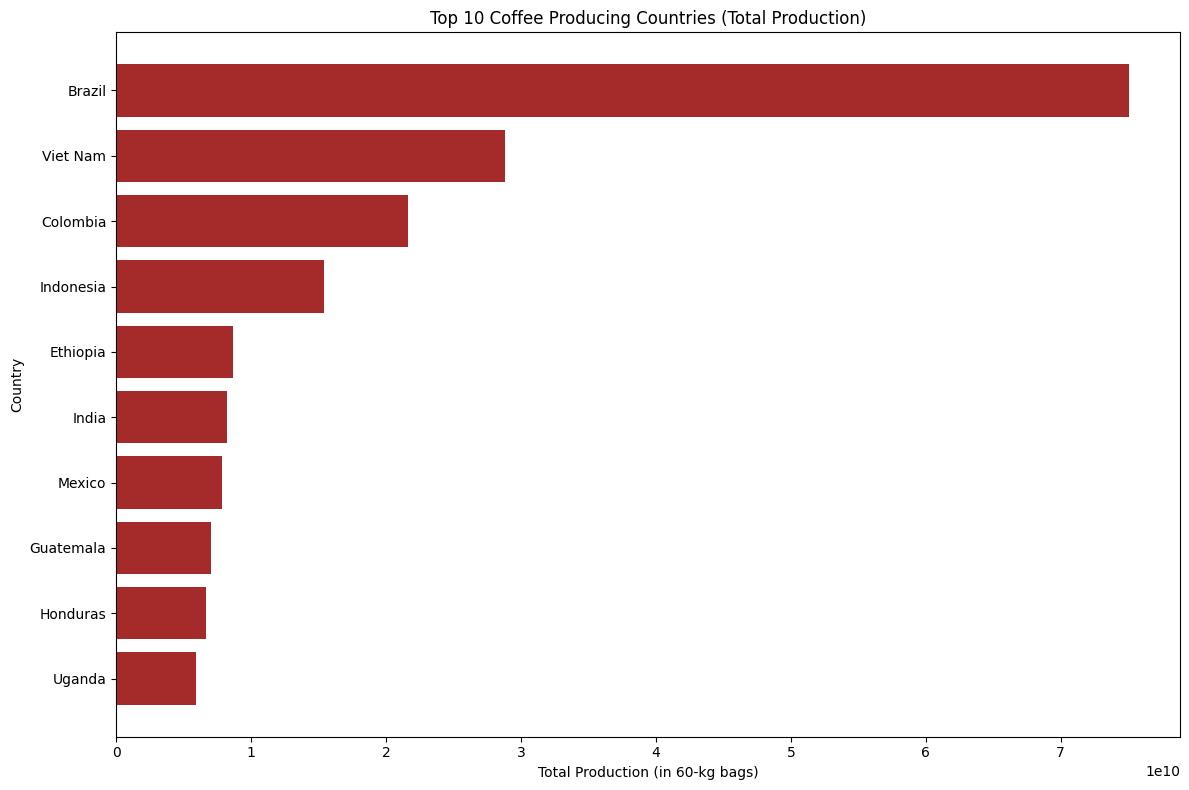

In [9]:
top_countries_total_production = coffee_production_data.sort_values(by='Total_production', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_countries_total_production['Country'], top_countries_total_production['Total_production'], color='brown')
plt.xlabel('Total Production (in 60-kg bags)')
plt.ylabel('Country')
plt.title('Top 10 Coffee Producing Countries (Total Production)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top
plt.tight_layout()
plt.show()

## 2.2 Yearly Coffee Consumption Trends of Top 10 Countries

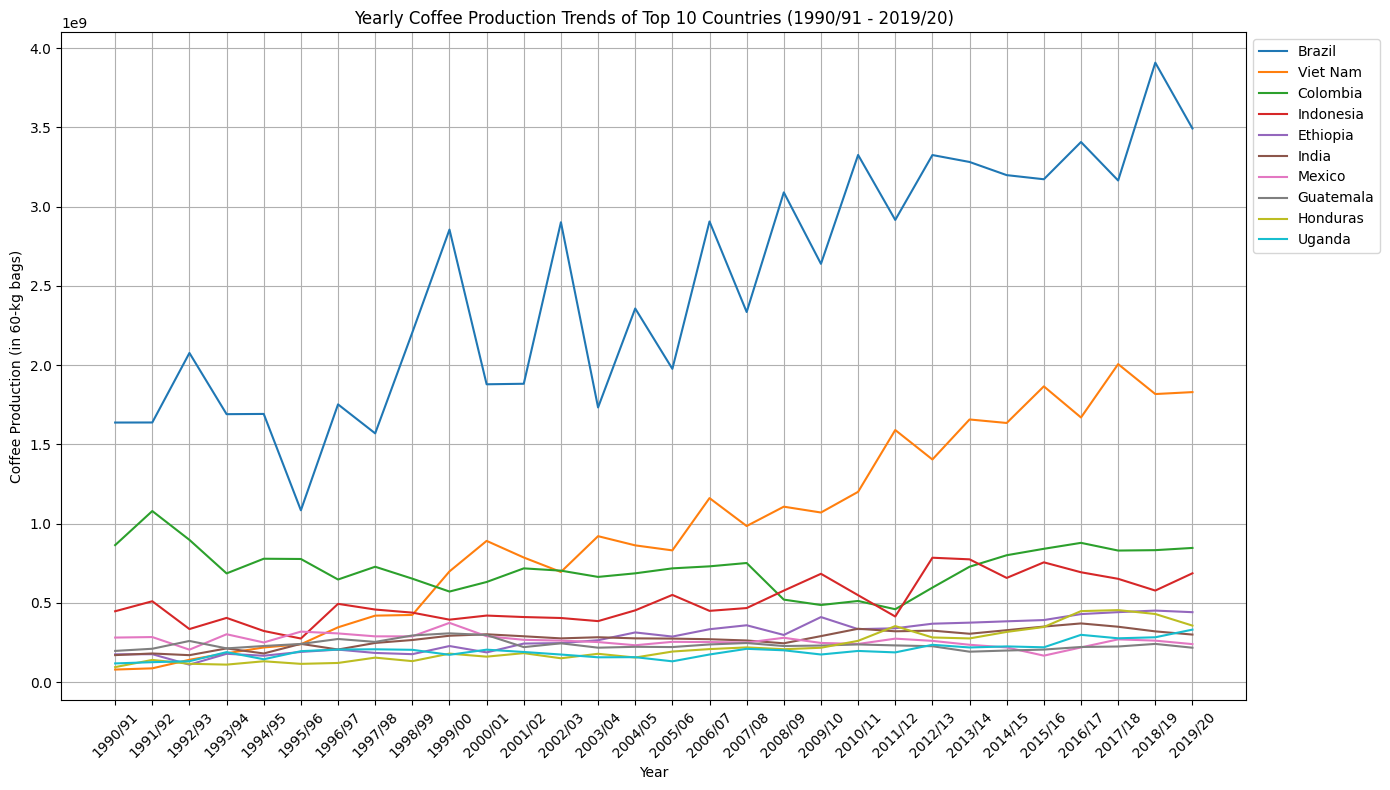

In [10]:
years_columns = top_countries_total_production.columns[2:-1] 
top_countries_trend = top_countries_total_production.set_index('Country')[years_columns].transpose()

# Plotting
plt.figure(figsize=(14, 8))
for country in top_countries_trend.columns:
    plt.plot(top_countries_trend.index, top_countries_trend[country], label=country)

plt.title('Yearly Coffee Production Trends of Top 10 Countries (1990/91 - 2019/20)')
plt.xlabel('Year')
plt.ylabel('Coffee Production (in 60-kg bags)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

## 2.3 Analysis of Global Coffee Consumption by Type

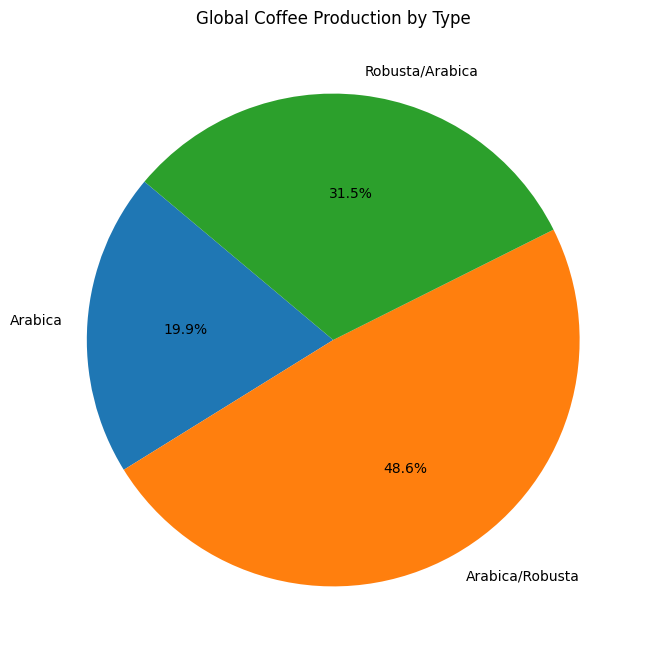

In [11]:
# Summarize global consumption by coffee type
coffee_type_sum = top_countries_total_production.groupby('Coffee type')['Total_production'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(coffee_type_sum, labels=coffee_type_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Global Coffee Production by Type')
plt.show()

## 2.4 Top 10 Coffee Consuming Countries by Coffee Type

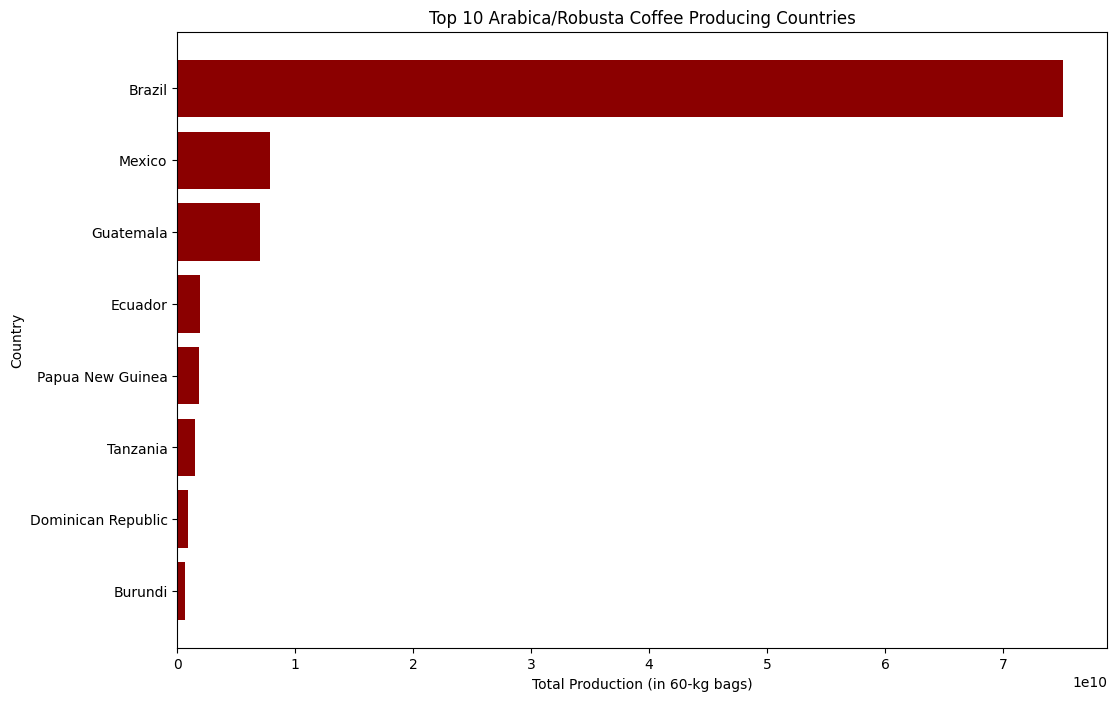

In [12]:
# Example for Arabica
arabica_robusta_data = coffee_production_data[coffee_production_data['Coffee type'].str.contains('Arabica/Robusta')]
top_arabica_robusta_countries = arabica_robusta_data.sort_values(by='Total_production', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_arabica_robusta_countries['Country'], top_arabica_robusta_countries['Total_production'], color='darkred')
plt.xlabel('Total Production (in 60-kg bags)')
plt.ylabel('Country')
plt.title('Top 10 Arabica/Robusta Coffee Producing Countries')
plt.gca().invert_yaxis()
plt.show()


## 3. Examining Relationship between Consumption and Production

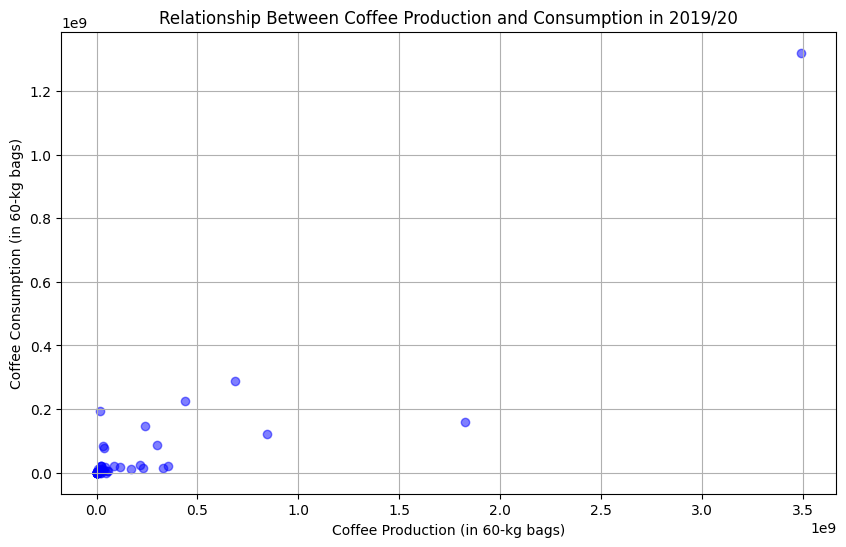

In [13]:
# Comparing production and comparison for Year 2019/20
consumption_2019_20 = coffee_consumption_data[['Country', '2019/20']].rename(columns={'2019/20': 'Consumption'})
production_2019_20 = coffee_production_data[['Country', '2019/20']].rename(columns={'2019/20': 'Production'})

merged_2019_20 = pd.merge(consumption_2019_20, production_2019_20, on='Country')

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_2019_20['Production'], merged_2019_20['Consumption'], color='blue', alpha=0.5)
plt.title('Relationship Between Coffee Production and Consumption in 2019/20')
plt.xlabel('Coffee Production (in 60-kg bags)')
plt.ylabel('Coffee Consumption (in 60-kg bags)')
plt.grid(True)
plt.show()

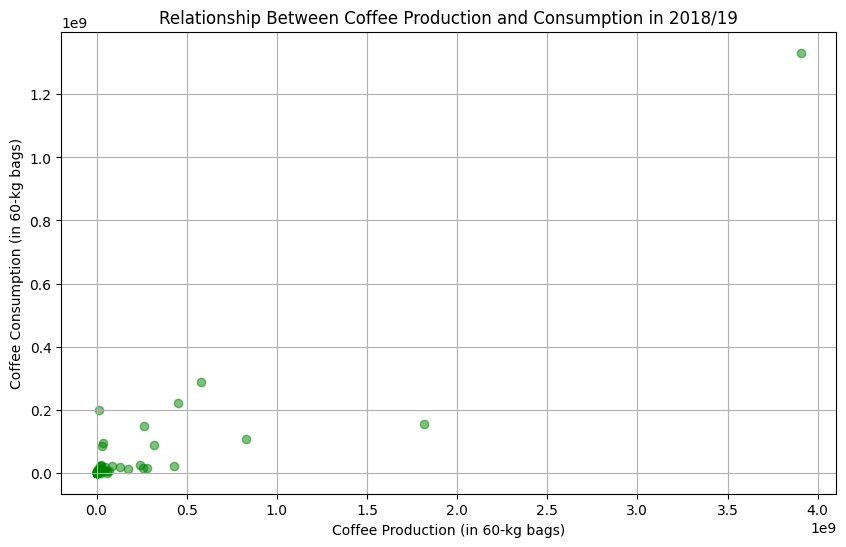

In [14]:
# Comparing production and comparison for Year 2018/19
consumption_2018_19 = coffee_consumption_data[['Country', '2018/19']].rename(columns={'2018/19': 'Consumption'})
production_2018_19 = coffee_production_data[['Country', '2018/19']].rename(columns={'2018/19': 'Production'})

merged_2018_19 = pd.merge(consumption_2018_19, production_2018_19, on='Country')

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(merged_2018_19['Production'], merged_2018_19['Consumption'], color='green', alpha=0.5)
plt.title('Relationship Between Coffee Production and Consumption in 2018/19')
plt.xlabel('Coffee Production (in 60-kg bags)')
plt.ylabel('Coffee Consumption (in 60-kg bags)')
plt.grid(True)
plt.show()

In [15]:
years = ['1990/91', '1991/92', '1992/93', '1993/94', '1994/95', '1995/96', '1996/97', '1997/98', 
         '1998/99', '1999/00', '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06', 
         '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', 
         '2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20']

# Add 'Country' to the list of columns to keep
columns_to_keep = ['Country'] + years

# Filter both datasets to include only the relevant columns
consumption_filtered = coffee_consumption_data[columns_to_keep]
production_filtered = coffee_production_data[columns_to_keep]

# Rename the yearly columns in one dataset to distinguish between production and consumption
# For clarity in the merged dataset
production_filtered.columns = ['Country'] + [f'{year}_Prod' for year in years]

# Merge the datasets on the 'Country' column
merged_data = pd.merge(consumption_filtered, production_filtered, on='Country')

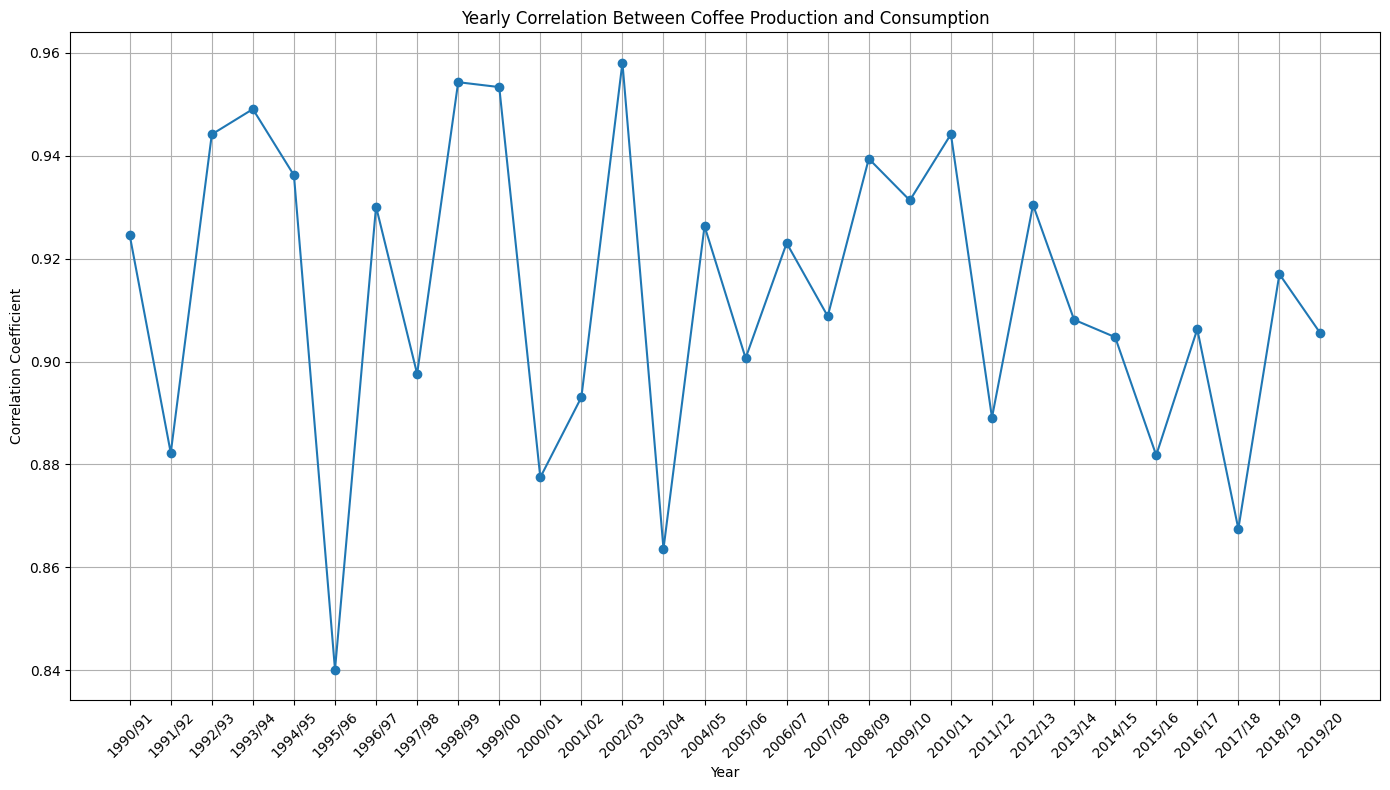

In [16]:
# Initialize a list to hold correlation coefficients for each year
yearly_correlations = []

for year in years:
    # For each year, calculate the correlation between production and consumption
    # Note: "{year}_Prod" corresponds to the production columns named as per previous example
    consumption_col = year  # Consumption column for the year
    production_col = f"{year}_Prod"  # Production column for the year
    
    # Filter out rows with missing data for the year
    valid_data = merged_data[[consumption_col, production_col]].dropna()
    
    # Calculate the correlation coefficient for the year
    correlation = valid_data[consumption_col].corr(valid_data[production_col])
    yearly_correlations.append((year, correlation))

# Convert the list of tuples to a DataFrame for easier visualization
correlation_df = pd.DataFrame(yearly_correlations, columns=['Year', 'Correlation'])

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(correlation_df['Year'], correlation_df['Correlation'], marker='o', linestyle='-')
plt.title('Yearly Correlation Between Coffee Production and Consumption')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()